# 数据科学导论大作业
***

# 一、数据集的导入

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 导入训练集和测试集
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
#数据样例
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,OUC2ARDQ,Female,30,RG275,Salaried,X1,25,No,984562,Yes
1,CUXDNKUA,Male,51,RG254,Self_Employed,X2,62,No,1102184,Yes
2,MCPI8ITG,Male,39,RG269,Self_Employed,X1,38,No,737053,Yes
3,UAZ4QB7A,Female,35,RG282,Salaried,X1,33,No,1839229,No
4,UNGD4ORF,Female,63,RG283,Other,X2,80,No,1627729,No


In [3]:
test.shape

(49145, 10)

In [4]:
#数据样例
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,SCVAQHXI,Female,29,RG277,Salaried,X1,26,No,302875,No,0
1,BHYZRTQT,Female,47,RG276,Self_Employed,X1,15,No,645552,Yes,0
2,6STHBLXU,Male,44,RG283,Self_Employed,X3,85,No,725777,Yes,0
3,KVFKFAM7,Male,77,RG268,Other,X3,49,No,2297704,Yes,0
4,RMCZIYYW,Female,84,RG279,Other,X2,93,No,555199,No,1


In [5]:
train.shape

(196580, 11)

该数据集分为训练数据集和测试数据集  
训练数据集为11维，共196580条数据，预测目标为Is_Lead。  
测试数据集为10维，不含Is_Lead属性，共49145条数据  

**属性说明**

| Variable          | Definition                                                   |
| ----------------- | ------------------------------------------------------------ |
| ID                | ID for Customer                                              |
| Gender            | Gender of Customer                                           |
| Age               | Age of Customer                                              |
| Region_Code       | Code of the Region for the Customer                          |
| Occupation        | Occupation Type for the Customer                             |
| Channel_Code      | Acquisition Channel Code for the Customer(Encoded)           |
| Vintage           | Vintage for the Customer(In Months)                          |
| Credit_Product    | If the Customer has any active credit product                |
| AvgAccountBalance | Average Account Balance for the Customer in last 12 Months   |
| Is_Active         | If the Customer is Active in last 3 Months                   |
| Is_Lead(Target)   | If the Customer is interested for the Credit Card                         0:not interested                    1:interested |


**类型统计**

# 二、数据预处理

### 缺失值处理

In [6]:
#检测缺失值
train.info()
train.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196580 entries, 0 to 196579
Data columns (total 11 columns):
ID                     196580 non-null object
Gender                 196580 non-null object
Age                    196580 non-null int64
Region_Code            196580 non-null object
Occupation             196580 non-null object
Channel_Code           196580 non-null object
Vintage                196580 non-null int64
Credit_Product         173216 non-null object
Avg_Account_Balance    196580 non-null int64
Is_Active              196580 non-null object
Is_Lead                196580 non-null int64
dtypes: int64(4), object(7)
memory usage: 16.5+ MB


ID                     False
Gender                 False
Age                    False
Region_Code            False
Occupation             False
Channel_Code           False
Vintage                False
Credit_Product          True
Avg_Account_Balance    False
Is_Active              False
Is_Lead                False
dtype: bool

Credit_Product 有数据缺失  
Credit_Product --------If the Customer has any active credit product


In [7]:
NullSum = train['Credit_Product'].isna().sum()
percent = NullSum / train['Credit_Product'].isna().count()
print(NullSum,'\n',train['Credit_Product'].isna().count(),percent)

23364 
 196580 0.11885237562315597


In [8]:
#删除有缺失值的行
#train = train.dropna(how='any')
train.isnull().any()

ID                     False
Gender                 False
Age                    False
Region_Code            False
Occupation             False
Channel_Code           False
Vintage                False
Credit_Product          True
Avg_Account_Balance    False
Is_Active              False
Is_Lead                False
dtype: bool

### 特征选择和处理

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(train['Gender'])
train['Gender']=le.transform(train['Gender'])

le.fit(train['Region_Code'])
train['Region_Code']=le.transform(train['Region_Code'])

le.fit(train['Channel_Code'])
train['Channel_Code']=le.transform(train['Channel_Code'])

le.fit(train['Credit_Product'])
train['Credit_Product']=le.transform(train['Credit_Product'])

le.fit(train['Is_Active'])
train['Is_Active']=le.transform(train['Is_Active'])

le.fit(train['Occupation'])
train['Occupation']=le.transform(train['Occupation'])

train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,SCVAQHXI,0,29,27,2,0,26,0,302875,0,0
1,BHYZRTQT,0,47,26,3,0,15,0,645552,1,0
2,6STHBLXU,1,44,33,3,2,85,0,725777,1,0
3,KVFKFAM7,1,77,18,1,2,49,0,2297704,1,0
4,RMCZIYYW,0,84,29,1,1,93,0,555199,0,1


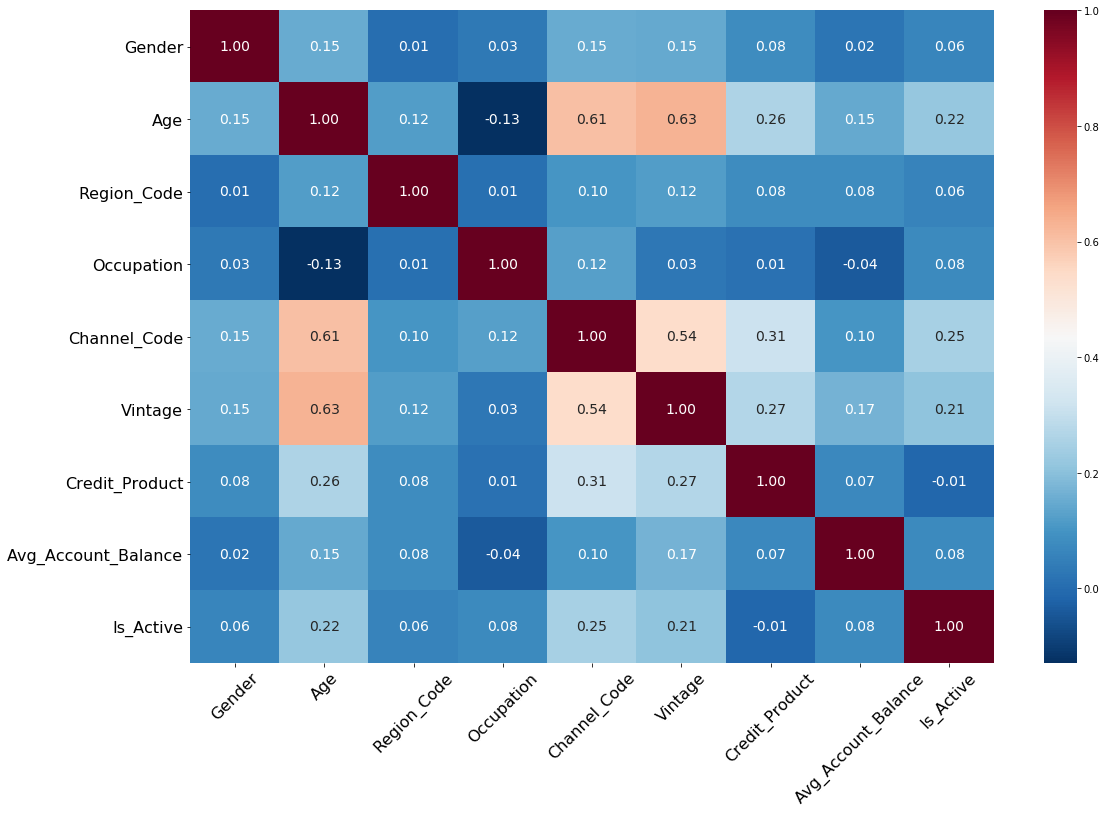

In [10]:
#预测分析
#查看各特征值两两相关性
df_corr = train.drop(['Is_Lead'],axis=1).corr()
plt.figure(figsize=(18, 12),)
sns.heatmap(df_corr, cmap='RdBu_r', annot=True, fmt='.2f',annot_kws={'fontsize':14})
plt.tick_params(axis='x',which='major',labelsize=16,labelrotation=45)
plt.tick_params(axis='y',which='major',labelsize=16)
plt.show()

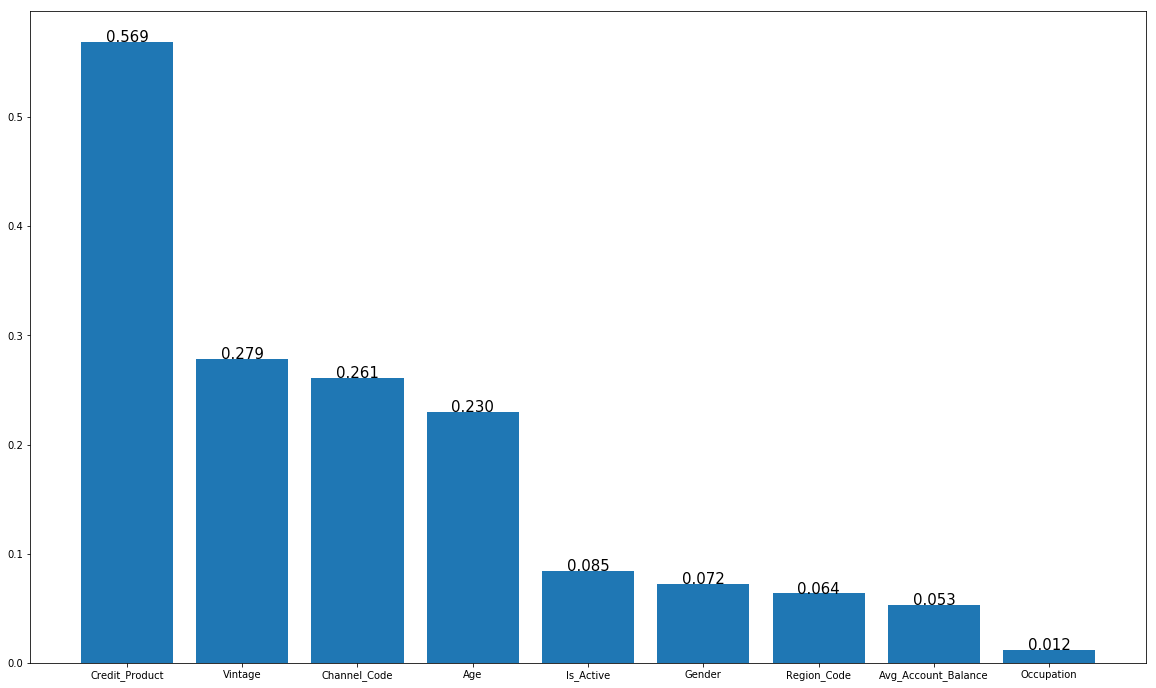

In [11]:
#查看各特征值与是否可能成为信用卡客户的相关性
df_corr_lead=train.corr()[u'Is_Lead'].sort_values(ascending=False)
df_corr_lead=df_corr_lead.drop(['Is_Lead'],axis=0)
#对其进行可视化
plt.figure(figsize=(20,12),)
plt.bar(list(df_corr_lead.index),df_corr_lead.values)
for i,j in zip(list(df_corr_lead.index),df_corr_lead.values):
    plt.text(i,j,'%s'%('{:.3f}'.format(j)),ha='center',size=15)
plt.show()

从图中可以看出Credit_Product，Vintage，Channel_Code，Age对与结果有相对大的相关性
我们不妨只保留这四个特征值，建立模型，进行预测。

# 三，建模预测

In [12]:
#导入模块

from sklearn.model_selection import train_test_split
from sklearn import metrics
y=train['Is_Lead']
df_train1=train.drop(['Is_Lead','ID','Avg_Account_Balance','Gender',
                         'Is_Active','Occupation','Region_Code'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(df_train1, y, test_size=0.2,random_state=42)


**逻辑回归模型**

In [13]:
#逻辑回归模型
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
acc_lr =metrics.accuracy_score( y_test,pred_lr)
print("Logistic Regression模型训练集的准确率：%.3f" %lr.score(x_train, y_train))
print("Logistic Regression模型测试集的准确率：%.3f" %lr.score(x_test, y_test))
print("Logistic Regression模型正确率：%.3f" %acc_lr)

Logistic Regression模型训练集的准确率：0.843
Logistic Regression模型测试集的准确率：0.843
Logistic Regression模型正确率：0.843


In [14]:
#查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(y_test,pred_lr)
print('The confusion matrix result:\n',confusion_matrix_result)

The confusion matrix result:
 [[28496  1412]
 [ 4776  4632]]


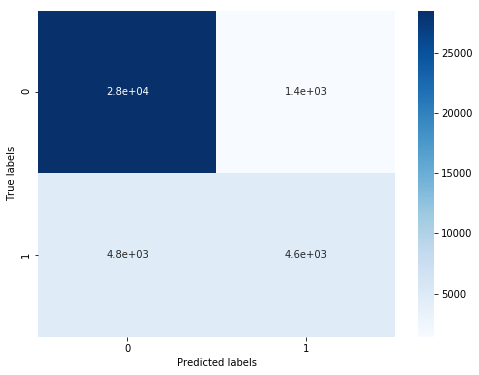

In [15]:
# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

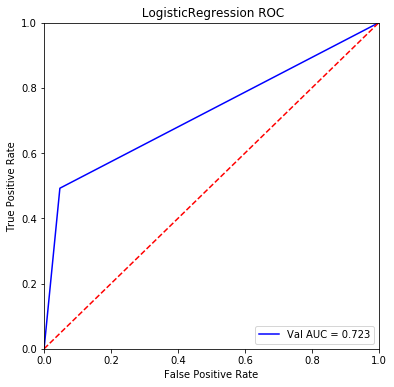

In [16]:
#roc auc
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_lr)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title(' LogisticRegression ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**决策树**

In [17]:
#决策树
from sklearn.tree import DecisionTreeClassifier
tree_=DecisionTreeClassifier()
# 在训练集上训练决策树模型
tree_.fit(x_train, y_train)

## 在训练集和测试集上分布利用训练好的模型进行预测
pred_dt = tree_.predict(x_test)
acc_dt=metrics.accuracy_score( y_test,pred_dt)
print("DecisionTreeClassifier模型训练集的准确率：%.3f" %tree_.score(x_train, y_train))
print("DecisionTreeClassifier模型测试集的准确率：%.3f" %tree_.score(x_test, y_test))
print("DecisionTreeClassifier模型正确率：%.3f" %acc_dt)

DecisionTreeClassifier模型训练集的准确率：0.870
DecisionTreeClassifier模型测试集的准确率：0.832
DecisionTreeClassifier模型正确率：0.832


In [18]:
confusion_matrix_result_dt = metrics.confusion_matrix(y_test,pred_dt)
print('The confusion matrix result:\n',confusion_matrix_result_dt)

The confusion matrix result:
 [[27985  1923]
 [ 4667  4741]]


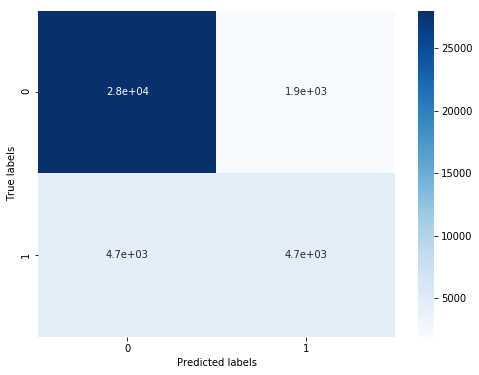

In [19]:
# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result_dt, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

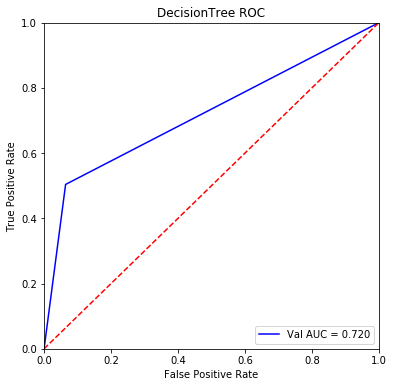

In [20]:
#roc auc
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_dt)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('DecisionTree ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**LightGBM**

In [21]:
#LightGBM
from lightgbm.sklearn import LGBMClassifier
## 定义 LightGBM 模型
lc=LGBMClassifier(boosting_type='dart'
                  ,feature_fraction=0.8
                  )
# 在训练集上训练LightGBM模型
lc.fit(x_train, y_train)


## 在训练集和测试集上分布利用训练好的模型进行预测
pred_lc = lc.predict(x_test)
acc_lc=metrics.accuracy_score( y_test,pred_lc)
print("LGBMClassifier模型训练集的准确率：%.3f" %lc.score(x_train, y_train))
print("LGBMClassifier模型测试集的准确率：%.3f" %lc.score(x_test, y_test))
print("LGBMClassifier模型正确率：%.3f" %acc_lc)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
LGBMClassifier模型训练集的准确率：0.851
LGBMClassifier模型测试集的准确率：0.850
LGBMClassifier模型正确率：0.850


In [22]:
confusion_matrix_result_gbm = metrics.confusion_matrix(y_test,pred_lc)
print('The confusion matrix result:\n',confusion_matrix_result_gbm)

The confusion matrix result:
 [[28484  1424]
 [ 4489  4919]]


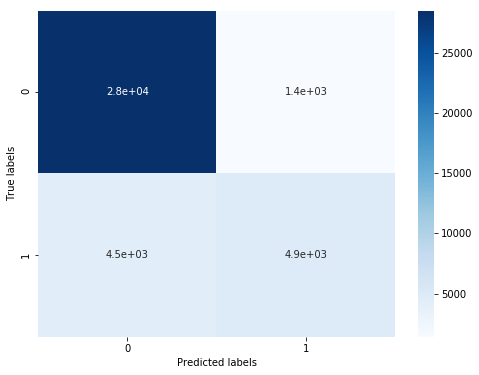

In [23]:
# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result_gbm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

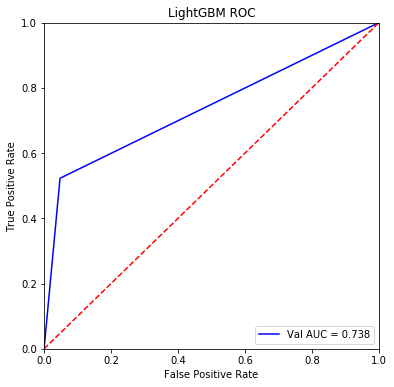

In [24]:
#roc auc
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_lc)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('LightGBM ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**k-邻近**

In [25]:
#k-邻近
# 导入KNN分类器
from sklearn.neighbors import KNeighborsClassifier
kc = KNeighborsClassifier(n_neighbors=5, p=2, metric="minkowski")
kc.fit(x_train, y_train)

## 在训练集和测试集上分别利用训练好的模型进行预测
pred_kc = kc.predict(x_test)
acc_kc=metrics.accuracy_score( y_test,pred_kc)
print("KNeighborsClassifier模型训练集的准确率：%.3f" %kc.score(x_train, y_train))
print("KNeighborsClassifier模型测试集的准确率：%.3f" %kc.score(x_test, y_test))
print("KNeighborsClassifier模型正确率：%.3f" %acc_kc)

KNeighborsClassifier模型训练集的准确率：0.852
KNeighborsClassifier模型测试集的准确率：0.828
KNeighborsClassifier模型正确率：0.828


In [26]:
confusion_matrix_result_kc = metrics.confusion_matrix(y_test,pred_kc)
print('The confusion matrix result:\n',confusion_matrix_result_kc)

The confusion matrix result:
 [[27632  2276]
 [ 4482  4926]]


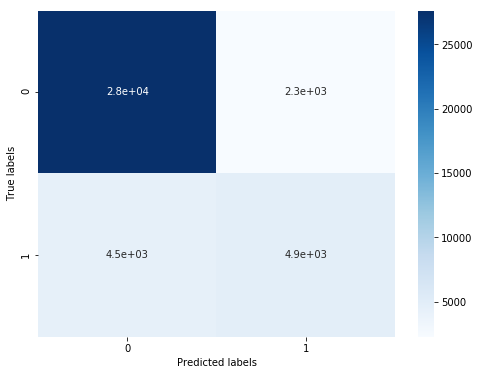

In [27]:
# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result_kc, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

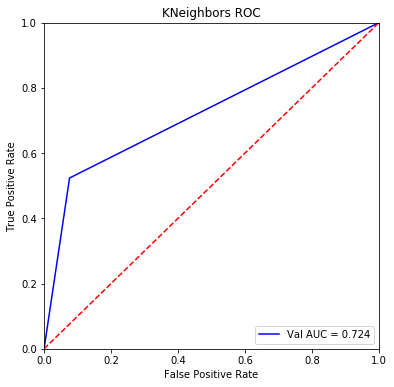

In [28]:
#roc auc
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_kc)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('KNeighbors ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**随机森林**

In [29]:
#随机森林
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

## 在训练集和测试集上分布利用训练好的模型进行预测
pred_rf = rf.predict(x_test)
acc_rf=metrics.accuracy_score( y_test,pred_rf)
print("RandomForestClassifier模型训练集的准确率：%.3f" %rf.score(x_train, y_train))
print("RandomForestClassifier模型测试集的准确率：%.3f" %rf.score(x_test, y_test))
print("RandomForestClassifier模型正确率：%.3f" %acc_rf)

RandomForestClassifier模型训练集的准确率：0.870
RandomForestClassifier模型测试集的准确率：0.833
RandomForestClassifier模型正确率：0.833


In [30]:
confusion_matrix_result_rf = metrics.confusion_matrix(y_test,pred_rf)
print('The confusion matrix result:\n',confusion_matrix_result_rf)

The confusion matrix result:
 [[27695  2213]
 [ 4349  5059]]


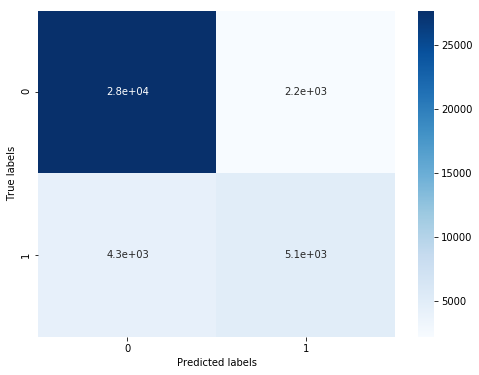

In [31]:
# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result_rf, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

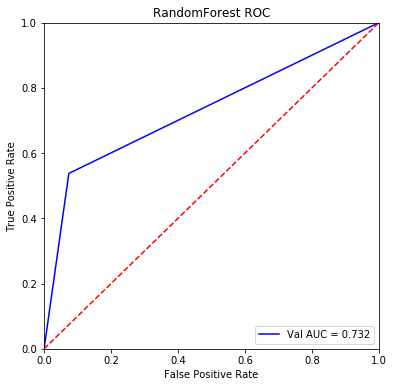

In [32]:
#roc auc
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_rf)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('RandomForest ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

在这些模型中，LightGBM模型的正确率较大，在这里采用LightGBM模型预测新数据集

In [33]:
#Credit_Product

test['Credit_Product'][test.Credit_Product.notnull()][test['Credit_Product']=='Yes']=1
test['Credit_Product'][test.Credit_Product.notnull()][test['Credit_Product']=='No']=0
test['Credit_Product']=test.Credit_Product.notnull().astype('int64')

#Channel_Code
print(test['Channel_Code'].unique())
test['Channel_Code']=test['Channel_Code'].apply(lambda x:x[1:]).astype('int64')


df_test1=test.drop(['ID','Avg_Account_Balance','Gender',
                         'Is_Active','Occupation','Region_Code'],axis=1)
df_test1.head(5)

['X1' 'X2' 'X3' 'X4']


,Age,Channel_Code,Vintage,Credit_Product
0,30,1,25,1
1,51,2,62,1
2,39,1,38,1
3,35,1,33,1
4,63,2,80,1


In [34]:
df_test1_pred=lc.predict_proba(df_test1)[:,1]
df_test1_pred

array([0.30399045, 0.33659583, 0.28448784, ..., 0.23445338, 0.19355939,
       0.23226979])

In [36]:
df_IS_Lead=pd.DataFrame(df_test1_pred)
df_IS_Lead[0][df_IS_Lead[0] > 0.5].count()

2535

In [ ]:
'''#把预测结果输出到csv文件里
df_IS_Lead=pd.DataFrame(df_test1_pred)
df_IS_Lead.to_csv('final/modelSelection.csv',index=False)
df_IS_Lead.shape'''